In [1]:
# JM: 26 Dec 2020
# plot some waves

import numpy as np
import matplotlib.pyplot as plt

# define some defaults
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # \"*_r\" is reverse of standard colour\n",
plt.rcParams["axes.formatter.limits"] = [-4, 4]
plt.rcParams["font.size"] = 12.0
# plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [2]:
# 1d rossby wave example: omega = -beta / k
x0, xf = 0, 8.0 * np.pi
x = np.linspace(x0, xf, 101)
beta = 1.0

def rossby_wave_1d(a, beta, k, x, t):
    omega = -beta / k
    eta = a * np.cos(k * x - omega * t)
    
    return eta

def rossby_vel(beta, k):
    cp = -beta / (k ** 2)
    cg =  beta / (k ** 2)
    
    return cp, cg

[]

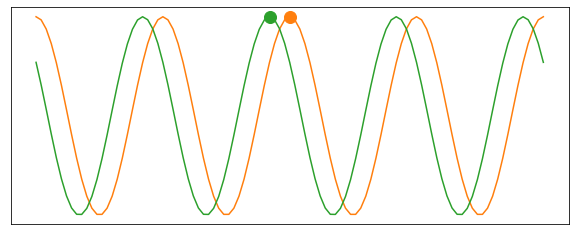

In [90]:
# plot a wave with a marker
a1 = 1
k1 = 1
x1 = 4*np.pi

t0 = 0
t1 = 1

cp1, _ = rossby_vel(beta, k1)

fig = plt.figure(figsize=(10, 4))
ax = plt.axes()

eta = rossby_wave_1d(a1, beta, k1, x, t0)
ax.plot(x, eta, 'C1')
ax.plot(x1, a1, 'C1o', markersize=12)

eta = rossby_wave_1d(a1, beta, k1, x, t1)
ax.plot(x, eta, 'C2')
ax.plot(x1 + cp1 * t1, a1, 'C2o', markersize=12)

ax.set_xticks([])
ax.set_yticks([])

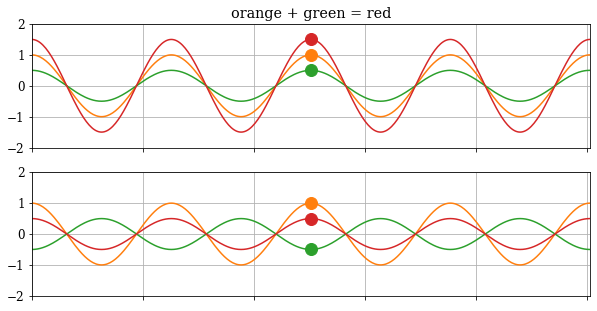

In [9]:
# plot inteference patterns
k1 = 1
x1 = 4*np.pi

t0 = 0
t1 = 1

cp1, _ = rossby_vel(beta, k1)

# constructive inteference
a1 = 1
a2 = 0.5
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(2, 1, 1)

eta = rossby_wave_1d(a1, beta, k1, x, t0)
ax.plot(x, eta, 'C1')
ax.plot(x1, a1, 'C1o', markersize=12)

eta = rossby_wave_1d(a2, beta, k1, x, t0)
ax.plot(x, eta, 'C2')
ax.plot(x1 + cp1 * t0, a2, 'C2o', markersize=12)

eta = rossby_wave_1d(a1 + a2, beta, k1, x, t0)
ax.plot(x, eta, 'C3')
ax.plot(x1 + cp1 * t0, a1 + a2, 'C3o', markersize=12)

ax.set_xlim([x0, xf])
ax.set_ylim([-2, 2])
ax.grid()
ax.set_xticklabels([])
ax.set_yticks([-2, -1, 0, 1, 2])

ax.set_title(f"orange + green = red")

# destructive inteference
a1 = 1
a2 = -0.5
ax = plt.subplot(2, 1, 2)

eta = rossby_wave_1d(a1, beta, k1, x, t0)
ax.plot(x, eta, 'C1')
ax.plot(x1, a1, 'C1o', markersize=12)

eta = rossby_wave_1d(a2, beta, k1, x, t0)
ax.plot(x, eta, 'C2')
ax.plot(x1 + cp1 * t0, a2, 'C2o', markersize=12)

eta = rossby_wave_1d(a1 + a2, beta, k1, x, t0)
ax.plot(x, eta, 'C3')
ax.plot(x1 + cp1 * t0, a1 + a2, 'C3o', markersize=12)

ax.set_xlim([x0, xf])
ax.set_ylim([-2, 2])
ax.grid()
ax.set_xticklabels([])
ax.set_yticks([-2, -1, 0, 1, 2])

plt.savefig("./pics/wave_perfect_interference.png", dpi=150, bbox_inches="tight")

In [3]:
def rossby_wave_envelope(a, beta, k1, k2, x, t):
    omega1 = -beta / k1
    eta1 = a * np.cos(k1 * x - omega1 * t)
    
    omega2 = -beta / k2
    eta2 = a * np.cos(k2 * x - omega2 * t)
    
    eta = eta1 + eta2
    
    return eta

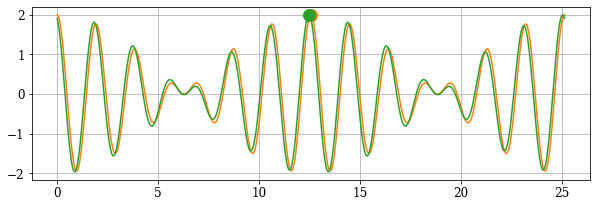

In [5]:
# slightly out of phase
x = np.linspace(x0, xf, 401)
a = 1
beta = 1
k1 = 3
k2 = 3.5

cg = beta / ( (0.5*(k1+k2)) ** 2)

fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(2, 1, 1)

eta = rossby_wave_envelope(a, beta, k1, k2, x, 0)
ax.plot(x, eta, 'C1')
ax.plot(x1, eta.max(), 'C1o', markersize=12)

eta = rossby_wave_envelope(a, beta, k1, k2, x, 1)
ax.plot(x, eta, 'C2')
ax.plot(x1 - cg * 1, eta.max(), 'C2o', markersize=12)
ax.grid()

In [28]:
# video of rossby phase and group velocities

a = 1
beta = 1
k1 = 3
k2 = 3.5
x = np.linspace(x0, xf, 401)

# finite difference of omega(k)
cg = ((-beta / k1) - (-beta / k2)) / (k1 - k2)

t_vec = np.linspace(0, 100, 501)

for i in range(len(t_vec)):
    
    t_dum = t_vec[i]

    omega1 = k1 * x - (-beta / k1) * t_dum
    omega2 = k2 * x - (-beta / k2) * t_dum

    fig = plt.figure(figsize=(10, 8))

    ax = plt.subplot(3, 1, 1)
    cp1, _ = rossby_vel(beta, k1)
    eta = rossby_wave_1d(a, beta, k1, x, t_dum)
    ax.plot(x, eta, 'C1')
    ax.plot(x1 + cp1 * t_dum, a, 'C1o', markersize=12)
    ax.plot([x1, x1], [-3, 3], 'k--', alpha=0.3)
    ax.set_xlim([x0, xf])
    ax.set_ylim([-2.2, 2.2])
    ax.grid()
    ax.set_xticklabels([])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_title(f"$k = {k1}$")

    ax = plt.subplot(3, 1, 2)
    cp2, _ = rossby_vel(beta, k2)
    eta = rossby_wave_1d(a, beta, k2, x, t_dum)
    ax.plot(x, eta, 'C2')
    ax.plot(x1 + cp2 * t_dum, a, 'C2^', markersize=12)
    ax.plot([x1, x1], [-3, 3], 'k--', alpha=0.3)
    ax.set_xlim([x0, xf])
    ax.set_ylim([-2.2, 2.2])
    ax.grid()
    ax.set_xticklabels([])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_title(f"$k = {k2}$")

    ax = plt.subplot(3, 1, 3)
    eta = rossby_wave_envelope(a, beta, k1, k2, x, t_dum)
    ax.plot(x, eta, 'C3')
    ax.plot(x1 + cg  * t_dum, 2.0 * a, 'C3s', markersize=12)
    ax.plot(x1 + cp1 * t_dum, a, 'C1o', markersize=12)
    ax.plot(x1 + cp2 * t_dum, a, 'C2^', markersize=12)
    ax.plot([x1, x1], [-3, 3], 'k--', alpha=0.3)
    ax.plot(x,  2.0 * a * np.cos(0.5 * (omega1 - omega2)), 'C3--')
    ax.plot(x, -2.0 * a * np.cos(0.5 * (omega1 - omega2)), 'C3--')
    ax.plot(x,  2.0 * a * np.cos(0.5 * (k1*x - k2*x)), 'k--', alpha=0.3)
    ax.plot(x, -2.0 * a * np.cos(0.5 * (k1*x - k2*x)), 'k--', alpha=0.3)
    ax.set_xlim([x0, xf])
    ax.set_ylim([-2.2, 2.2])
    ax.grid()
    ax.set_xticklabels([])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_title(f"$t = {t_dum:.2f}$")
    
    plt.savefig(f"./pics/rossby_wave_prop_{i:04}.png", dpi=150, bbox_inches="tight")
#     plt.savefig(f"./pics/rossby_wave_prop_{i:04}.png", bbox_inches="tight")
    plt.close(fig)

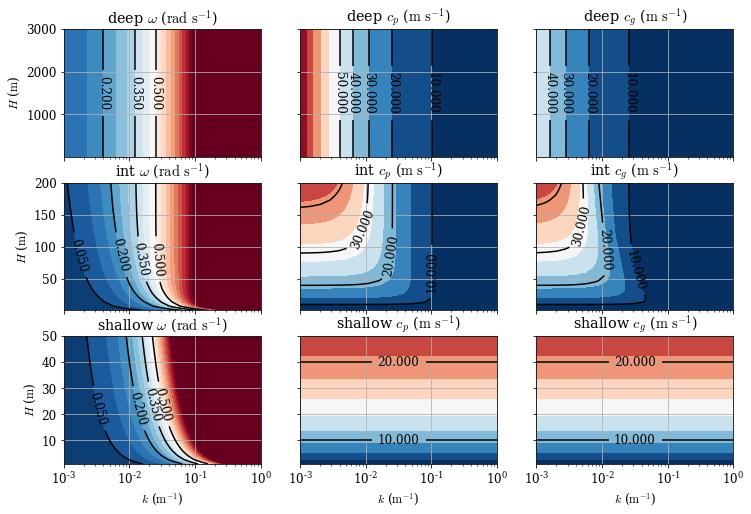

In [132]:
# (surface) gravity waves

g = 10.0
H = np.linspace(1, 3000, 31)
k = np.logspace(-3, 0, 21)

omega = np.zeros((len(H), len(k)))
cp = np.zeros((len(H), len(k)))
cg = np.zeros((len(H), len(k)))

for i in range(len(H)):
    for j in range(len(k)):
        omega[i, j] =       np.sqrt(g * k[j])
        cp   [i, j] =       np.sqrt(g / k[j])
        cg   [i, j] = 0.5 * np.sqrt(g / k[j])
        
         
fig = plt.figure(figsize=(12, 8))

# deep waves
ax = plt.subplot(3, 3, 1)
levels = np.arange(0.0, 1, 0.05)
ax.contourf(k, H, omega, levels=levels, extend="both")
levels = np.arange(0.05, 0.55, 0.15)
cs = ax.contour(k, H, omega, levels=levels, colors="k")
ax.clabel(cs)
ax.set_xscale("log")
ax.set_title(r"deep $\omega$ ($\mathrm{rad}\ \mathrm{s}^{-1}$)")
ax.set_xticklabels([])
ax.set_ylabel(r"$H$ ($\mathrm{m}$)")
ax.grid()

ax = plt.subplot(3, 3, 2)
levels = np.linspace(10, 100, 10)
ax.contourf(k, H, cp, levels=levels, extend="both")
levels = np.linspace(10, 50, 5)
cs = ax.contour(k, H, cp, levels=levels, colors="k")
ax.clabel(cs)
ax.set_xscale("log")
ax.set_title(r"deep $c_p$ ($\mathrm{m}\ \mathrm{s}^{-1}$)")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

ax = plt.subplot(3, 3, 3)
levels = np.linspace(10, 100, 10)
ax.contourf(k, H, cg, levels=levels, extend="both")
levels = np.linspace(10, 50, 5)
cs = ax.contour(k, H, cg, levels=levels, colors="k")
ax.clabel(cs)
ax.set_xscale("log")
ax.set_title(r"deep $c_g$ ($\mathrm{m}\ \mathrm{s}^{-1}$)")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

# int waves
# sinh(H) gets too big, so don't have H going up that much

H = np.linspace(1, 200, 31)

omega = np.zeros((len(H), len(k)))
cp = np.zeros((len(H), len(k)))
cg = np.zeros((len(H), len(k)))

for i in range(len(H)):
    for j in range(len(k)):
        omega[i, j] =       np.sqrt(g * k[j] * np.tanh(k[j] * H[i]))
        cp   [i, j] =       np.sqrt(g / k[j] * np.tanh(k[j] * H[i]))
        cg   [i, j] = 0.5 * cp[i, j] * (1.0  + 2.0 * k[j] * H[i] / np.sinh(2.0 * k[j] * H[i]))

ax = plt.subplot(3, 3, 4)
levels = np.arange(0.0, 1, 0.05)
ax.contourf(k, H, omega, levels=levels, extend="both")
levels = np.arange(0.05, 0.55, 0.15)
cs = ax.contour(k, H, omega, levels=levels, colors="k")
ax.set_xscale("log")
ax.set_title(r"int $\omega$ ($\mathrm{rad}\ \mathrm{s}^{-1}$)")
ax.set_xticklabels([])
ax.set_ylabel(r"$H$ ($\mathrm{m}$)")
ax.clabel(cs)
ax.grid()

ax = plt.subplot(3, 3, 5)
levels = np.linspace(10, 50, 10)
ax.contourf(k, H, cp, levels=levels, extend="both")
levels = np.linspace(10, 50, 5)
cs = ax.contour(k, H, cp, levels=levels, colors="k")
ax.set_xscale("log")
ax.set_title(r"int $c_p$ ($\mathrm{m}\ \mathrm{s}^{-1}$)")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.clabel(cs)
ax.grid()

ax = plt.subplot(3, 3, 6)
levels = np.linspace(10, 50, 10)
ax.contourf(k, H, cg, levels=levels, extend="both")
levels = np.linspace(10, 50, 5)
cs = ax.contour(k, H, cg, levels=levels, colors="k")
ax.set_xscale("log")
ax.set_title(r"int $c_g$ ($\mathrm{m}\ \mathrm{s}^{-1}$)")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.clabel(cs)
ax.grid()

# shallow waves

H = np.linspace(1, 50, 31)

omega = np.zeros((len(H), len(k)))
cp = np.zeros((len(H), len(k)))
cg = np.zeros((len(H), len(k)))

for i in range(len(H)):
    for j in range(len(k)):
        omega[i, j] = k[j] * np.sqrt(g * H[i])
        cp   [i, j] =        np.sqrt(g * H[i])
        cg   [i, j] =        np.sqrt(g * H[i])

ax = plt.subplot(3, 3, 7)
levels = np.arange(0.0, 1, 0.05)
ax.contourf(k, H, omega, levels=levels, extend="both")
levels = np.arange(0.05, 0.55, 0.15)
cs = ax.contour(k, H, omega, levels=levels, colors="k")
ax.set_xscale("log")
ax.set_title(r"shallow $\omega$ ($\mathrm{rad}\ \mathrm{s}^{-1}$)")
ax.set_xlabel(r"$k$ ($\mathrm{m}^{-1}$)")
ax.set_ylabel(r"$H$ ($\mathrm{m}$)")
ax.clabel(cs)
ax.grid()

ax = plt.subplot(3, 3, 8)
levels = np.linspace(5, 25, 10)
ax.contourf(k, H, cp, levels=levels, extend="both")
levels = [10, 20]
cs = ax.contour(k, H, cp, levels=levels, colors="k")
ax.set_xscale("log")
ax.set_title(r"shallow $c_p$ ($\mathrm{m}\ \mathrm{s}^{-1}$)")
ax.set_xlabel(r"$k$ ($\mathrm{m}^{-1}$)")
ax.set_yticklabels([])
ax.clabel(cs)
ax.grid()

ax = plt.subplot(3, 3, 9)
levels = np.linspace(5, 25, 10)
ax.contourf(k, H, cg, levels=levels, extend="both")
levels = [10, 20]
cs = ax.contour(k, H, cg, levels=levels, colors="k")
ax.set_xscale("log")
ax.set_title(r"shallow $c_g$ ($\mathrm{m}\ \mathrm{s}^{-1}$)")
ax.set_xlabel(r"$k$ ($\mathrm{m}^{-1}$)")
ax.set_yticklabels([])
ax.clabel(cs)
ax.grid()

plt.savefig("./pics/water_waves_dispersion.png", dpi=150, bbox_inches="tight")

<ipython-input-73-38e993498fbf>:64: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(kx, ky, np.log10(cgx_pos), cmap="Reds", extend="both")
<ipython-input-73-38e993498fbf>:65: RuntimeWarning: divide by zero encountered in log10
  cs1 = ax.contour(kx, ky, np.log10(cgx_pos), colors="k")
<ipython-input-73-38e993498fbf>:67: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(kx, ky, np.log10(np.abs(cgx_neg)), cmap="Blues", extend="both")
<ipython-input-73-38e993498fbf>:68: RuntimeWarning: divide by zero encountered in log10
  cs2 = ax.contour(kx, ky, np.log10(np.abs(cgx_neg)), colors="k")


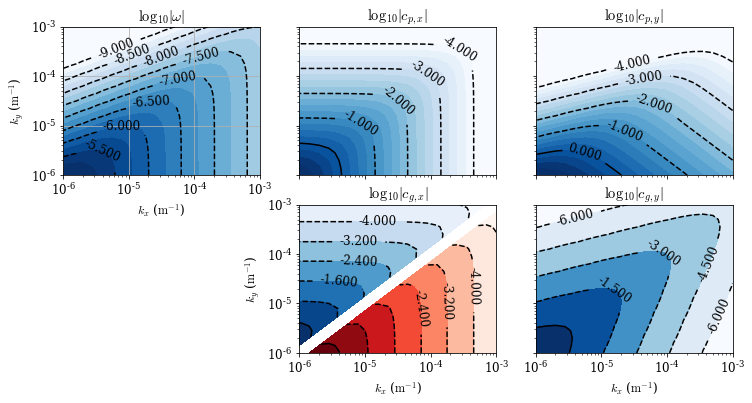

In [73]:
# Rossby waves

beta = 2e-11
ky = np.logspace(-6, -3, 21)
kx = np.logspace(-6, -3, 21)

omega = np.zeros((len(ky), len(kx)))
cpx = np.zeros((len(ky), len(kx)))
cpy = np.zeros((len(ky), len(kx)))
cgx = np.zeros((len(ky), len(kx)))
cgy = np.zeros((len(ky), len(kx)))

for j in range(len(ky)):
    for i in range(len(kx)):
        K2 = (kx[i] ** 2 + ky[j] ** 2)
        omega[j, i] =      -beta * kx[i]                     /  K2
        cpx  [j, i] =      -beta                             /  K2
        cpy  [j, i] =      -beta * kx [i] / ky[j]            /  K2
        cgx  [j, i] =       beta * (kx[i] ** 2 - ky[j] ** 2) / (K2 ** 2)
        cgy  [j, i] = 2.0 * beta * (kx[i] * ky[j])           / (K2 ** 2)
        
         
fig = plt.figure(figsize=(12, 6))

ax = plt.subplot(2, 3, 1)
levels = np.arange(-9, -5, 0.25)
ax.contourf(kx, ky, np.log10(np.abs(omega)), cmap="Blues", levels=levels, extend="both")
levels = np.arange(-9, -5, 0.5)
cs = ax.contour(kx, ky, np.log10(np.abs(omega)), levels=levels, colors="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.set_title(r"$\log_{10}|\omega|$")
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_ylabel(r"$k_y$ ($\mathrm{m}^{-1}$)")
ax.grid()

ax = plt.subplot(2, 3, 2)
levels = np.arange(-4, 1, 0.25)
ax.contourf(kx, ky, np.log10(np.abs(cpx)), cmap="Blues", levels=levels, extend="both")
levels = np.arange(-4, 1, 1)
cs = ax.contour(kx, ky, np.log10(np.abs(cpx)), levels=levels, colors="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.set_title(r"$\log_{10}|c_{p,x}|$")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = plt.subplot(2, 3, 3)
levels = np.arange(-4, 1, 0.25)
ax.contourf(kx, ky, np.log10(np.abs(cpy)), cmap="Blues", levels=levels, extend="both")
levels = np.arange(-4, 1, 1)
cs = ax.contour(kx, ky, np.log10(np.abs(cpy)), levels=levels, colors="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.set_title(r"$\log_{10}|c_{p,y}|$")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = plt.subplot(2, 3, 5)
cgx_pos = np.where(cgx > 0, cgx, 0)
ax.contourf(kx, ky, np.log10(cgx_pos), cmap="Reds", extend="both")
cs1 = ax.contour(kx, ky, np.log10(cgx_pos), colors="k")
cgx_neg = np.where(cgx < 0, cgx, 0)
ax.contourf(kx, ky, np.log10(np.abs(cgx_neg)), cmap="Blues", extend="both")
cs2 = ax.contour(kx, ky, np.log10(np.abs(cgx_neg)), colors="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs1)
ax.clabel(cs2)
ax.set_title(r"$\log_{10}|c_{g,x}|$")
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_ylabel(r"$k_y$ ($\mathrm{m}^{-1}$)")

ax = plt.subplot(2, 3, 6)
ax.contourf(kx, ky, np.log10(np.abs(cgy)), cmap="Blues", extend="both")
cs = ax.contour(kx, ky, np.log10(np.abs(cgy)), colors="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.set_title(r"$\log_{10}|c_{g,y}|$")
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_yticklabels([])

plt.savefig("./pics/rossby_waves_dispersion.png", dpi=150, bbox_inches="tight")

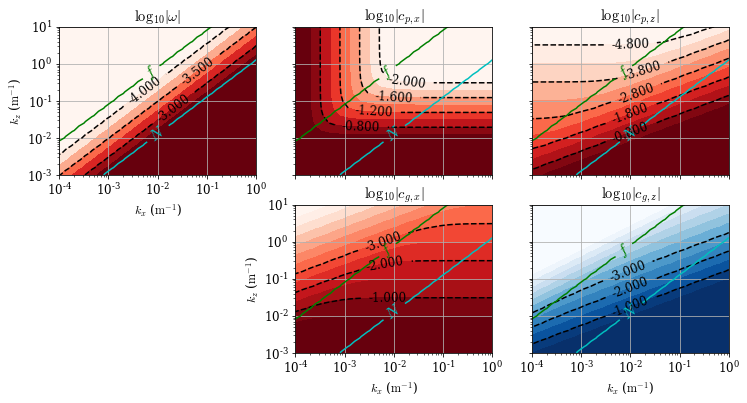

In [2]:
# inertia-gravity waves
# both the general and kz>>kx case is done
f = 5e-5
N = 3.0e-3 # so N2 ~ 1e-6

f2, N2 = f ** 2, N ** 2

kz = np.logspace(-3, 1, 21)
kx = np.logspace(-4, 0, 31)

omega = np.zeros((len(kz), len(kx)))
cpx = np.zeros((len(kz), len(kx)))
cpz = np.zeros((len(kz), len(kx)))
cgx = np.zeros((len(kz), len(kx)))
cgz = np.zeros((len(kz), len(kx)))

for j in range(len(kz)):
    for i in range(len(kx)):
        # full case
#         K2 = (kx[i] ** 2 + kz[j] ** 2)
#         omega[j, i] =      np.sqrt( (N2 * (kx[i] ** 2) + f2 * (kz[j] ** 2)) /  K2)
#         cpx  [j, i] =      omega[j, i] / kx[i]
#         cpz  [j, i] =      omega[j, i] / kz[j]
#         cgx  [j, i] =  kx[i] / K2 * (N2 -  omega[j, i] ** 2) / omega[j, i]
#         cgz  [j, i] =  kz[j] / K2 * (f2  - omega[j, i] ** 2) / omega[j, i]
        
        # m^2 >> k^2 case
        omega[j, i] =      np.sqrt( f2 + N2 * (kx[i] ** 2 / kz[j] ** 2) )
        cpx  [j, i] =      omega[j, i] / kx[i]
        cpz  [j, i] =      omega[j, i] / kz[j]
        cgx  [j, i] =   N2 * (kx[i]      / kz[j] ** 2) / omega[j, i]
        cgz  [j, i] =  -N2 * (kx[i] ** 2 / kz[j] ** 3) / omega[j, i]

fig = plt.figure(figsize=(12, 6))

ax = plt.subplot(2, 3, 1)
levels = np.arange(-4, -2.5, 0.25)
ax.contourf(kx, kz, np.log10(omega), levels=levels, cmap="Reds", extend="both")
levels = np.arange(-4, -2.5, 0.5)
cs = ax.contour(kx, kz, np.log10(omega), levels=levels, colors="k")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_title(r"$\log_{10}|\omega|$")
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_ylabel(r"$k_z$ ($\mathrm{m}^{-1}$)")
ax.grid()

ax = plt.subplot(2, 3, 2)
levels = np.arange(-2, -0.4, 0.2)
ax.contourf(kx, kz, np.log10(cpx), levels=levels, cmap="Reds", extend="both")
levels = np.arange(-2, -0.4, 0.4)
cs = ax.contour(kx, kz, np.log10(cpx), levels=levels, colors="k")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_title(r"$\log_{10} |c_{p,x}|$")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

ax = plt.subplot(2, 3, 3)
levels = np.arange(-4.8, -0, 0.5)
ax.contourf(kx, kz, np.log10(cpz), levels=levels, cmap="Reds", extend="both")
levels = np.arange(-4.8, -0, 1)
cs = ax.contour(kx, kz, np.log10(cpz), levels=levels, colors="k")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_title(r"$\log_{10} |c_{p,z}|$")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

ax = plt.subplot(2, 3, 5)
levels = np.arange(-6, -0, 0.5)
ax.contourf(kx, kz, np.log10(cgx), levels=levels, cmap="Reds", extend="both")
levels = np.arange(-3, -0, 1)
cs = ax.contour(kx, kz, np.log10(cgx), levels=levels, colors="k")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_title(r"$\log_{10} |c_{g,x}|$")
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_ylabel(r"$k_z$ ($\mathrm{m}^{-1}$)")
ax.grid()

ax = plt.subplot(2, 3, 6)
levels = np.arange(-6, -0, 0.5)
ax.contourf(kx, kz, np.log10(-cgz), levels=levels, cmap="Blues", extend="both")
levels = np.arange(-3, -0, 1)
cs = ax.contour(kx, kz, np.log10(-cgz), levels=levels, colors="k")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.set_xscale("log")
ax.set_yscale("log")
ax.clabel(cs)
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_title(r"$\log_{10} |c_{g,z}|$")
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_yticklabels([])
ax.grid()

plt.savefig("./pics/igw_dispersion.png", dpi=150, bbox_inches="tight")

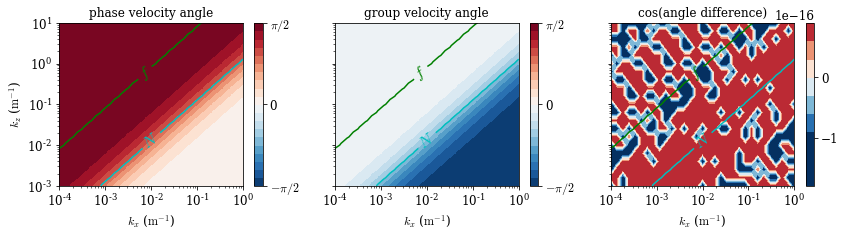

In [12]:
# inertia-gravity angles

angle_k  = np.zeros((len(kz), len(kx)))
angle_cp = np.zeros((len(kz), len(kx)))
for j in range(len(kz)):
    for i in range(len(kx)):
        K2 = (kx[i] ** 2 + kz[j] ** 2)
        angle_k [j, i] = np.arctan2(omega[j, i] * kz[j] / K2, omega[j, i] * kx[i] / K2)
        angle_cp[j, i] = np.arctan2(cgz[j, i], cgx[j, i])
        
levels = np.linspace(-1, 1, 21)

fig = plt.figure(figsize=(14, 3))
ax = plt.subplot(1, 3, 1)
cs = ax.contourf(kx, kz, angle_k / (np.pi / 2), levels=levels)
ax.set_xscale("log")
ax.set_yscale("log")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
cb = plt.colorbar(cs)
cb.set_ticks([-1, 0, 1])
cb.set_ticklabels([r"$-\pi/2$", r"0", r"$\pi/2$"])
ax.set_title(r"phase velocity angle", fontsize=12)
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")
ax.set_ylabel(r"$k_z$ ($\mathrm{m}^{-1}$)")

ax = plt.subplot(1, 3, 2)
cs = ax.contourf(kx, kz, angle_cp / (np.pi / 2), levels=levels)
ax.set_xscale("log")
ax.set_yscale("log")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_yticklabels([])
cb = plt.colorbar(cs)
cb.set_ticks([-1, 0, 1])
cb.set_ticklabels([r"$-\pi/2$", r"0", r"$\pi/2$"])
ax.set_title(r"group velocity angle", fontsize=12)
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")

ax = plt.subplot(1, 3, 3)
cs = ax.contourf(kx, kz, np.cos((angle_k - angle_cp)), vmin=-1e-16, vmax=1e-16)
ax.set_xscale("log")
ax.set_yscale("log")
fs = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(f)+0.1], colors="g", linestyles="-") # give f and N a bit of slack
Ns = ax.contour(kx, kz, np.log10(omega), levels=[np.log10(N)-0.1], colors="c", linestyles="-")
ax.clabel(fs, fmt=r"$f$", fontsize=16)
ax.clabel(Ns, fmt=r"$N$", fontsize=16)
ax.set_yticklabels([])
cb = plt.colorbar(cs)
cb.set_ticks([-1e-16, 0, 1e-16])
ax.set_title(r"cos(angle difference)", fontsize=12)
ax.set_xlabel(r"$k_x$ ($\mathrm{m}^{-1}$)")

plt.savefig("./pics/igw_wave_angles.png", dpi=150, bbox_inches="tight")